In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('portuguese'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('C:\\Users\\Taynara\\Desktop\\Dados.xlsx')
df.head()

,Órgãos,Ementas,N. Processos,Apelantes,Apelados,Relatores,N. Acórdãos,Decisões,Datas,Saída
0,3ª Turma Cível,PROCESSO CIVIL. PENSÃO POR MORTE DE SERVIDOR P...,AGRAVO DE INSTRUMENTO 0703201-60.2018.8.07.0000,DISTRITO FEDERAL,SILVIA SANTANA NOBRE,MARIA DE LOURDES ABREU,1116154,"CONHECER E DAR PARCIAL PROVIMENTO, UNÂNIME",18 de Julho de 2018,Parcialmente
1,3ª Turma Cível,PROCESSO CIVIL. PRELIMINAR. CERCEAMENTO DE DEF...,APELAÇÃO CÍVEL 0716314-15.2017.8.07.0001,LUIS HENRIQUE ALMEIDA PRADO DE OLIVEIRA e MART...,MARTA REGINA QUEIROZ ROSSIGNOLLI e LUIS HENRIQ...,MARIA DE LOURDES ABREU,1148840,"CONHECER, REJEITAR AS PRELIMINARES, NEGAR PROV...",06 de Fevereiro de 2019,Desprovido
2,4ª Turma Cível,APELAÇÃO CÍVEL. AÇÃO CUMPRIMENTO DE PRECEITO L...,APELAÇÃO CÍVEL 0709736-02.2018.8.07.0001,ESCRITORIO CENTRAL DE ARRECADACAO E DISTRIBUIC...,NOVA GAZICO SERVICOS EM TECNOLOGIA DA INFORMAC...,SÉRGIO ROCHA,1158566,"NEGAR PROVIMENTO AO RECURSO, UNÂNIME",13 de Março de 2019,Desprovido
3,3ª Turma Cível,APELAÇÃO CÍVEL. AÇÃO DE BUSCA E APREENSÃO. MÚT...,APELAÇÃO CÍVEL 0703630-12.2018.8.07.0005,BV FINANCEIRA S/A CFI,JAKISON RAYRON ARAUJO PEIXOTO,ALVARO CIARLINI,1174071,"CONHECER E NEGAR PROVIMENTO, UNÂNIME",22 de Maio de 2019,Desprovido
4,3ª Turma Cível,APELAÇÃO CÍVEL. ADMINISTRATIVO E CONSTITUCIONA...,APELAÇÃO CÍVEL 0702545-10.2017.8.07.0010,CLEMENTINO PEREIRA MATOS NETO,DISTRITO FEDERAL e SERVICOS HOSPITALARES YUGE S.A,ALVARO CIARLINI,1174078,"CONHECER, ACOLHER A PRELIMINAR DE NULIDADE DA ...",22 de Maio de 2019,Outros


In [3]:
df.count()

Órgãos          15521
Ementas         15521
N. Processos    15521
Apelantes       15521
Apelados        15521
Relatores       15521
N. Acórdãos     15521
Decisões        15521
Datas           15521
Saída           15521
dtype: int64

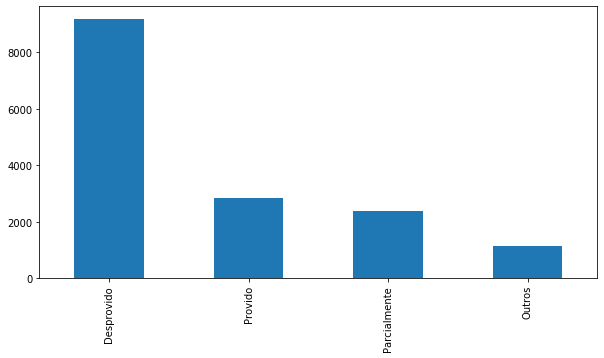

In [4]:
df['Saída'].value_counts().plot.bar(figsize=(10,5))

In [5]:
df['Saída'].isnull().sum()

0

In [6]:
df = df.dropna()

y = df['Saída'].str.lower()
sentences = df['Decisões'].str.lower()

In [7]:
sentences = sentences.values
y = y.values

In [8]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.20, random_state=42, shuffle=True)

In [9]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

### Naive Bayes

In [10]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

              precision    recall  f1-score   support

  desprovido       0.99      0.98      0.99      1824
      outros       0.88      0.93      0.90       228
parcialmente       0.98      0.98      0.98       488
     provido       0.96      0.97      0.96       565

    accuracy                           0.97      3105
   macro avg       0.95      0.96      0.96      3105
weighted avg       0.98      0.97      0.98      3105

Accuracy for data: 0.9749


### LinearSVC

In [11]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

              precision    recall  f1-score   support

  desprovido       1.00      0.99      1.00      1824
      outros       0.94      0.98      0.96       228
parcialmente       1.00      0.99      1.00       488
     provido       0.99      1.00      1.00       565

    accuracy                           0.99      3105
   macro avg       0.98      0.99      0.99      3105
weighted avg       0.99      0.99      0.99      3105

Accuracy for data: 0.9936


### Logistic Regression


In [12]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

              precision    recall  f1-score   support

  desprovido       1.00      0.99      1.00      1824
      outros       0.95      0.99      0.97       228
parcialmente       1.00      0.99      1.00       488
     provido       1.00      1.00      1.00       565

    accuracy                           0.99      3105
   macro avg       0.99      0.99      0.99      3105
weighted avg       0.99      0.99      0.99      3105

Accuracy for data: 0.9945


C:\Users\Taynara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Taynara\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Nearest Neighbors

In [13]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

              precision    recall  f1-score   support

  desprovido       0.98      1.00      0.99      1824
      outros       0.98      0.85      0.91       228
parcialmente       0.99      0.99      0.99       488
     provido       0.99      0.99      0.99       565

    accuracy                           0.99      3105
   macro avg       0.99      0.96      0.97      3105
weighted avg       0.99      0.99      0.99      3105

Accuracy for data: 0.9855


### Decision Trees

In [14]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

              precision    recall  f1-score   support

  desprovido       1.00      0.99      1.00      1824
      outros       0.94      0.96      0.95       228
parcialmente       1.00      0.99      1.00       488
     provido       1.00      1.00      1.00       565

    accuracy                           0.99      3105
   macro avg       0.98      0.99      0.99      3105
weighted avg       0.99      0.99      0.99      3105

Accuracy for data: 0.9926
